In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
log = LogisticRegression()
import math
from sklearn.linear_model import LinearRegression



In [2]:
df = pd.read_excel('IBM Employee Attrition.xlsx ')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
NumCompaniesWorked          1470 non-null int64
Over18                      1470 non-null object
OverTime             

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [6]:
df= df.drop(['BusinessTravel','Department','EducationField','JobRole','Over18','MaritalStatus'],axis=1)

In [7]:
df.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1,2,1,2,Female,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,49,No,8,1,2,3,Male,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,2,2,4,4,Male,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,33,No,3,4,5,4,Female,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,2,1,7,1,Male,3,1,2,...,3,4,1,6,3,3,2,2,2,2


In [8]:
df= pd.get_dummies(df,columns=['Attrition','Gender','OverTime'],drop_first=True)

In [9]:
df.head()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,Gender_Male,OverTime_Yes
0,41,1,2,1,2,3,2,4,5993,8,...,8,0,1,6,4,0,5,1,0,1
1,49,8,1,2,3,2,2,2,5130,1,...,10,3,3,10,7,1,7,0,1,0
2,37,2,2,4,4,2,1,3,2090,6,...,7,3,3,0,0,0,0,1,1,1
3,33,3,4,5,4,3,1,3,2909,1,...,8,3,3,8,7,3,0,0,0,1
4,27,2,1,7,1,3,1,2,3468,9,...,6,3,3,2,2,2,2,0,1,0


In [10]:
df.corr()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,Gender_Male,OverTime_Yes
Age,1.000000,-0.001686,0.208034,-0.010145,0.010146,0.029820,0.509604,-0.004892,0.497855,0.299635,...,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205,-0.036311,0.028062
DistanceFromHome,-0.001686,1.000000,0.021042,0.032916,-0.016075,0.008783,0.005303,-0.003669,-0.017014,-0.029251,...,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924,-0.001851,0.025514
Education,0.208034,0.021042,1.000000,0.042070,-0.027128,0.042438,0.101589,-0.011296,0.094961,0.126317,...,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373,-0.016547,-0.020322
EmployeeNumber,-0.010145,0.032916,0.042070,1.000000,0.017621,-0.006888,-0.018519,-0.046247,-0.014829,-0.001251,...,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,-0.010577,0.022556,-0.024037
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,0.017621,1.000000,-0.008278,0.001212,-0.006784,-0.006259,0.012594,...,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369,0.000508,0.070132
JobInvolvement,0.029820,0.008783,0.042438,-0.006888,-0.008278,1.000000,-0.012630,-0.021476,-0.015271,0.015012,...,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016,0.017960,-0.003507
JobLevel,0.509604,0.005303,0.101589,-0.018519,0.001212,-0.012630,1.000000,-0.001944,0.950300,0.142501,...,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105,-0.039403,0.000544
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.046247,-0.006784,-0.021476,-0.001944,1.000000,-0.007157,-0.055699,...,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.103481,0.033252,0.024539
MonthlyIncome,0.497855,-0.017014,0.094961,-0.014829,-0.006259,-0.015271,0.950300,-0.007157,1.000000,0.149515,...,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079,-0.159840,-0.031858,0.006089
NumCompaniesWorked,0.299635,-0.029251,0.126317,-0.001251,0.012594,0.015012,0.142501,-0.055699,0.149515,1.000000,...,0.237639,-0.066054,-0.008366,-0.118421,-0.090754,-0.036814,-0.110319,0.043494,-0.039147,-0.020786


In [11]:
import statsmodels.api as sm

In [12]:
y = df['Attrition_Yes']

In [13]:
X = df.drop(['Attrition_Yes'], axis=1)

In [14]:
X['intercept'] = 1

In [15]:
model = sm.Logit(y,X).fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\Users\MR_SA\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [16]:
model.summary()

C:\Users\MR_SA\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\MR_SA\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1446
Method:                           MLE   Df Model:                           23
Date:                Sun, 26 Apr 2020   Pseudo R-squ.:                     inf
Time:                        12:30:10   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0328      0.013     -2.569      0.010      -0.058      -0.008
DistanceFromHome             0.0370      0.010      3.684      0.000       0.017       0.057
Education                    0.0258      0.082      0.315      0.753      -0.135       0.186
EmployeeNumber           -7.524e-05      0.000     -0.543      0.587      -0.000       0.000
EnvironmentSatisfaction     -0.3833      0.076     -5.015      0.000      -0.533      -0.234
JobInvolvement              -0.5349      0.115     -4.670      0.000      -0.759      -0.310
JobLevel                    -0.0529      0.263     -0.201      0.841      -0.569       0.463
JobSatisfaction             -0.3608      0.075     -4.780      0.000      -0.509      -0.213
MonthlyIncome            -7.385e-05   6.42e-05     -1.151      0.250      -0.000    5.19e-05
NumCompaniesWorked           0.1685      0.035      4.785      0.000       0.099       0.237
PercentSalaryHike           -0.0385      0.036     -1.062      0.288      -0.109       0.032
PerformanceRating            0.2143      0.368      0.582      0.561      -0.508       0.937
RelationshipSatisfaction    -0.2539      0.078     -3.255      0.001      -0.407      -0.101
StockOptionLevel            -0.5874      0.110     -5.350      0.000      -0.803      -0.372
TotalWorkingYears           -0.0631      0.027     -2.352      0.019      -0.116      -0.011
TrainingTimesLastYear       -0.1230      0.067     -1.829      0.067      -0.255       0.009
WorkLifeBalance             -0.2362      0.113     -2.096      0.036      -0.457      -0.015
YearsAtCompany               0.0827      0.036      2.301      0.021       0.012       0.153
YearsInCurrentRole          -0.1366      0.042     -3.224      0.001      -0.220      -0.054
YearsSinceLastPromotion      0.1594      0.039      4.045      0.000       0.082       0.237
YearsWithCurrManager        -0.1204      0.043     -2.787      0.005      -0.205      -0.036
Gender_Male                  0.3510      0.173      2.032      0.042       0.012       0.690
OverTime_Yes                 1.7539      0.176      9.956      0.000       1.409       2.099
intercept                    4.3337      1.140      3.800      0.000       2.098       6.569
============================================================================================
"""

In [17]:
model.params

Age                        -0.032792
DistanceFromHome            0.037028
Education                   0.025751
EmployeeNumber             -0.000075
EnvironmentSatisfaction    -0.383300
JobInvolvement             -0.534881
JobLevel                   -0.052932
JobSatisfaction            -0.360819
MonthlyIncome              -0.000074
NumCompaniesWorked          0.168471
PercentSalaryHike          -0.038454
PerformanceRating           0.214331
RelationshipSatisfaction   -0.253890
StockOptionLevel           -0.587384
TotalWorkingYears          -0.063117
TrainingTimesLastYear      -0.123020
WorkLifeBalance            -0.236229
YearsAtCompany              0.082688
YearsInCurrentRole         -0.136607
YearsSinceLastPromotion     0.159352
YearsWithCurrManager       -0.120389
Gender_Male                 0.351025
OverTime_Yes                1.753884
intercept                   4.333666
dtype: float64

In [18]:
odds_ratio = np.exp(model.params)

In [19]:
print(odds_ratio)

Age                          0.967740
DistanceFromHome             1.037722
Education                    1.026085
EmployeeNumber               0.999925
EnvironmentSatisfaction      0.681608
JobInvolvement               0.585739
JobLevel                     0.948444
JobSatisfaction              0.697105
MonthlyIncome                0.999926
NumCompaniesWorked           1.183494
PercentSalaryHike            0.962276
PerformanceRating            1.239033
RelationshipSatisfaction     0.775777
StockOptionLevel             0.555780
TotalWorkingYears            0.938833
TrainingTimesLastYear        0.884246
WorkLifeBalance              0.789600
YearsAtCompany               1.086203
YearsInCurrentRole           0.872313
YearsSinceLastPromotion      1.172751
YearsWithCurrManager         0.886575
Gender_Male                  1.420523
OverTime_Yes                 5.776999
intercept                   76.223184
dtype: float64


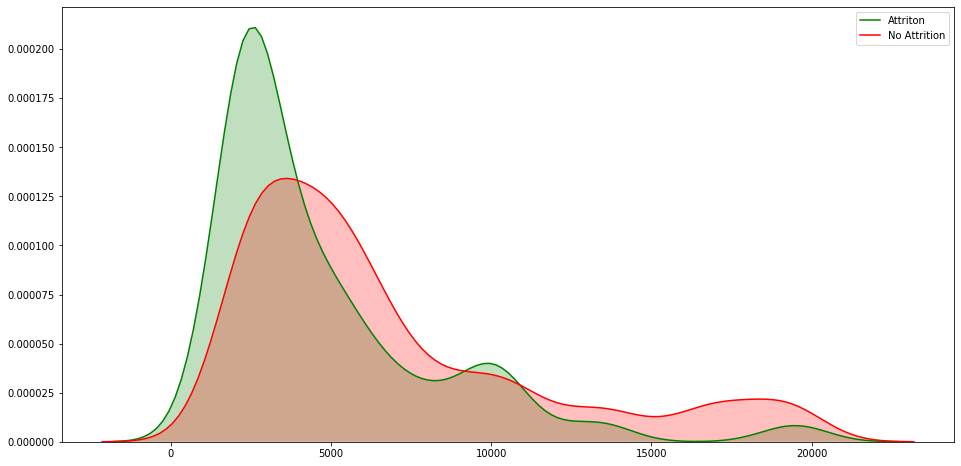

In [24]:
plt.figure(figsize=(16,8))
aa = sns.kdeplot(df['MonthlyIncome'][df['Attrition_Yes']==1],color='green',shade=True, label= 'Attriton')
sns.kdeplot(df['MonthlyIncome'][df['Attrition_Yes']==0],color='red',shade=True,label='No Attrition')
            

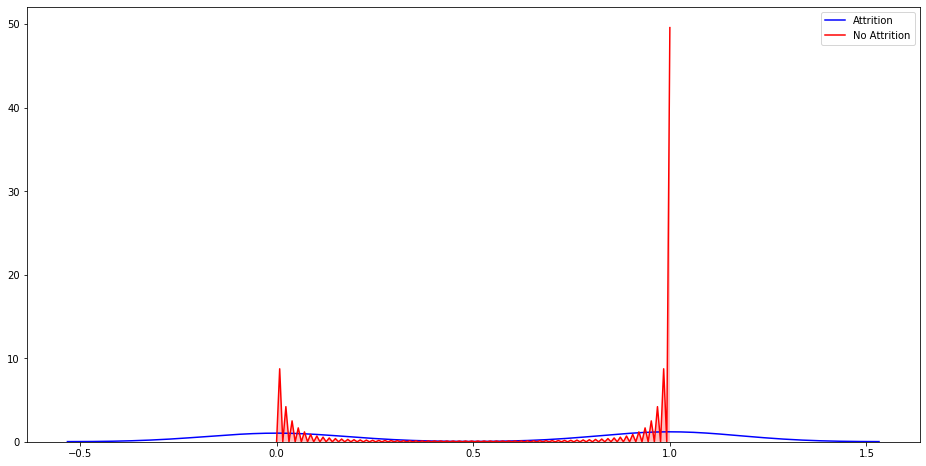

In [30]:
plt.figure(figsize=(16,8))
aa =sns.kdeplot(df['OverTime_Yes'][df['Attrition_Yes']==1],color='blue',label='Attrition')
sns.kdeplot(df['OverTime_Yes'][df['Attrition_Yes']==0],color='red',shade=True,label='No Attrition')

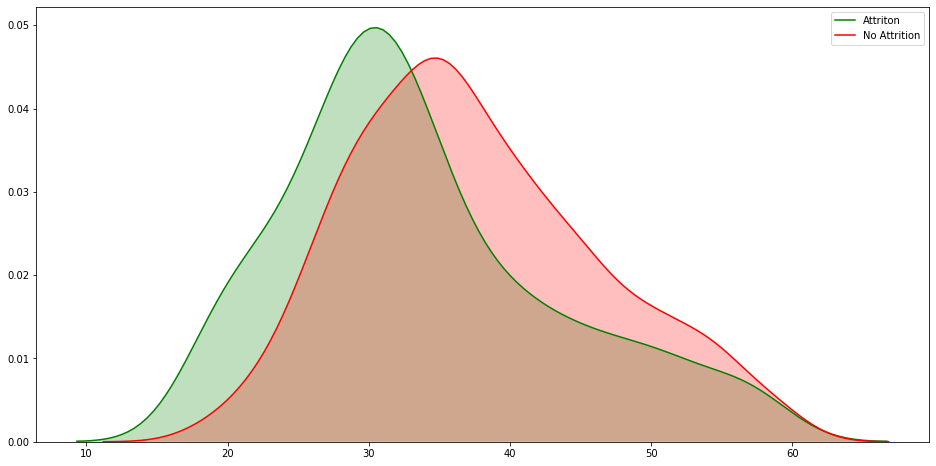

In [31]:
plt.figure(figsize=(16,8))
aa = sns.kdeplot(df['Age'][df['Attrition_Yes']==1],color='green',shade=True, label= 'Attriton')
sns.kdeplot(df['Age'][df['Attrition_Yes']==0],color='red',shade=True,label='No Attrition')
            

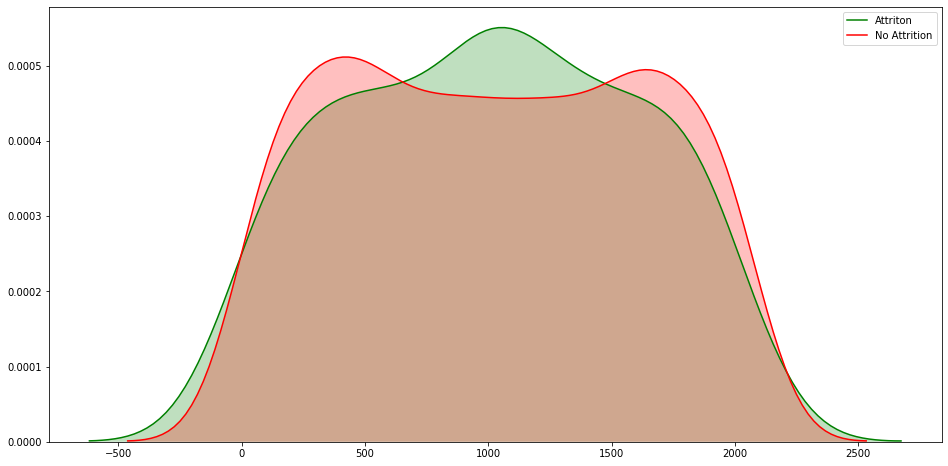

In [32]:
plt.figure(figsize=(16,8))
aa = sns.kdeplot(df['EmployeeNumber'][df['Attrition_Yes']==1],color='green',shade=True, label= 'Attriton')
sns.kdeplot(df['EmployeeNumber'][df['Attrition_Yes']==0],color='red',shade=True,label='No Attrition')
            

In [38]:
df['Attrition_Yes'].value_counts()

0    1233
1     237
Name: Attrition_Yes, dtype: int64

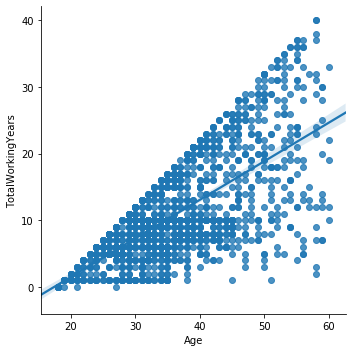

In [39]:
sns.lmplot (x = "Age", y = "TotalWorkingYears", data = df)

In [4]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromot